In [1]:
from env import *
from agent import *

In [2]:
TARGET_UPDATE = 5
num_episodes = 200
hidden = 128
gamma = 0.99
replay_buffer_size = 100000
batch_size = 128
eps_stop = 0.01
epsilon = 0.6
eps = 0.5
Start_epsilon_decaying = 0
# End_epsilon_decaying = num_episodes // 1
End_epsilon_decaying = 200
epsilon_decaying = epsilon / (End_epsilon_decaying - Start_epsilon_decaying)

In [3]:
env = None

with open("maps/1.map") as f:
    env = Env.json_to_env(f.read())


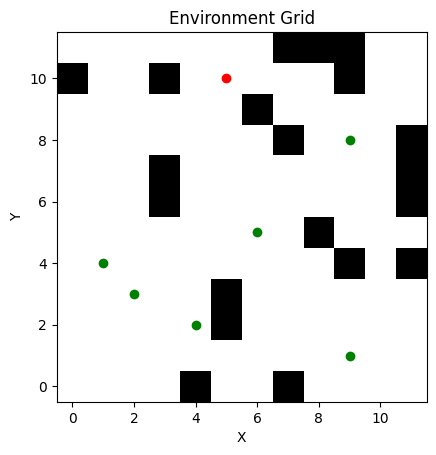

In [4]:
plot_env(env)

In [5]:
agent = DQNAgent(env.state0.shape, N_ACTIONS, replay_buffer_size, batch_size, gamma)

In [7]:
random.seed(20)
env.reset()

cumulative_rewards = []
num_steps = []
counter_reach_goal = 0
last50_rewards = []
last50_steps = []

for ep in range(num_episodes):
    collected_data_times = {0: [], 1: [], 2: [], 3: [], 4: []}
    state = env.reset()
    done = False
    eps -= epsilon_decaying
    epsilon = max(eps_stop, eps)
    cum_reward = 0
    counter = 0
    number_of_steps_taken_to_terminal = 0
    while not done and counter < env.max_episode_steps:
        action = agent.get_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        cum_reward += reward
        agent.store_transition(state, action, next_state, reward, done)
        agent.update_network()
        state = next_state
        counter += 1
        number_of_steps_taken_to_terminal += 1
    if done:
        print("number of steps taken by the agent:", number_of_steps_taken_to_terminal)
    num_steps.append(number_of_steps_taken_to_terminal)
    cumulative_rewards.append(cum_reward)
    print("episode: %d: reward: %6.2f" % (ep, cum_reward))
    print("**********************************************")
    if ep % TARGET_UPDATE == 0:
        agent.update_target_network()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x147456 and 1152x64)